In [1]:
import sys
sys.path.append('/Data/yangyoupeng/pythonproject/Tensor/CHUNK/')
import Chunk
print(Chunk.__file__)
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

/Data/yangyoupeng/pythonproject/Tensor/CHUNK/Chunk/__init__.py


In [2]:
expr_df = pd.read_csv("/Data/yangyoupeng/pythonproject/Tensor/Data/expr_df.csv", header=0, index_col=0).T #expr_df: the samples as columns and genes as rows

In [3]:
lr_expr_pairs, lr_expr_df = Chunk.filter_Bulkdata(expr_df,threshold=1)

In [4]:
clin_df = pd.read_csv('/Data/yangyoupeng/pythonproject/Tensor/Data/clin_df.csv',index_col=0,header = 0)
S, Y, lr_expr_df, phenotype_interval, sorted_clin_df = Chunk.getBinaryConstraint(
    clin_df=clin_df,
    lr_expr_df=lr_expr_df,
    by='tissue_type',
    phenotype_of_interest='Tumor'
)

In [5]:
comm_matrix2 = Chunk.build_communication_matrix(lr_expr_pairs, lr_expr_df)

In [6]:
optimal_K = Chunk.select_k_nmf(
    comm_matrix2.T.values.astype(float), S, k_max=20, repeat_times=5, verbose=True, 
    use_semi_supervised=True,
    semi_supervised_params={"alpha": 0.01, "beta": 0.01, "rho": 0.75}
)
print(f"Recommended K: {optimal_K}")

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: 

K=2, Reconstruction Error=552364.4375


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


K=3, Reconstruction Error=473951.2812


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: 

K=4, Reconstruction Error=418885.2812
K=4, eii=0.4125


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


K=5, Reconstruction Error=386294.9313
K=5, eii=0.1962


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: 

K=6, Reconstruction Error=361583.8250
K=6, eii=0.1295


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


K=7, Reconstruction Error=341025.4688
K=7, eii=0.0973


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: 

K=8, Reconstruction Error=326232.4875
K=8, eii=0.0654


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: 

K=9, Reconstruction Error=312725.9250
K=9, eii=0.0564


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


K=10, Reconstruction Error=302290.3187
K=10, eii=0.0417
Recommended K: 9


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


In [7]:
W, H, loss_history = Chunk.LRcommMining(X = comm_matrix2.T.values.astype(float), S=S, n_components=optimal_K+1, alpha=0.01, beta=0.01, rho=0.75, maxiter=8000, lr=0.001)

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


Iteration 0/8000, Loss: 302315.3750
Iteration 50/8000, Loss: 301723.9375
Iteration 100/8000, Loss: 301231.0000
Iteration 150/8000, Loss: 300827.6875
Iteration 200/8000, Loss: 300484.4062
Iteration 250/8000, Loss: 300183.4062
Iteration 300/8000, Loss: 299913.4375
Iteration 350/8000, Loss: 299667.5000
Iteration 400/8000, Loss: 299440.3438
Iteration 450/8000, Loss: 299228.0312
Iteration 500/8000, Loss: 299027.2500
Iteration 550/8000, Loss: 298836.5938
Iteration 600/8000, Loss: 298655.4062
Iteration 650/8000, Loss: 298481.6562
Iteration 700/8000, Loss: 298313.8125
Iteration 750/8000, Loss: 298150.8438
Iteration 800/8000, Loss: 297992.6250
Iteration 850/8000, Loss: 297838.3438
Iteration 900/8000, Loss: 297687.7812
Iteration 950/8000, Loss: 297541.3750
Iteration 1000/8000, Loss: 297398.1875
Iteration 1050/8000, Loss: 297257.9375
Iteration 1100/8000, Loss: 297119.5938
Iteration 1150/8000, Loss: 296983.7500
Iteration 1200/8000, Loss: 296851.9688
Iteration 1250/8000, Loss: 296725.9375
Iteration

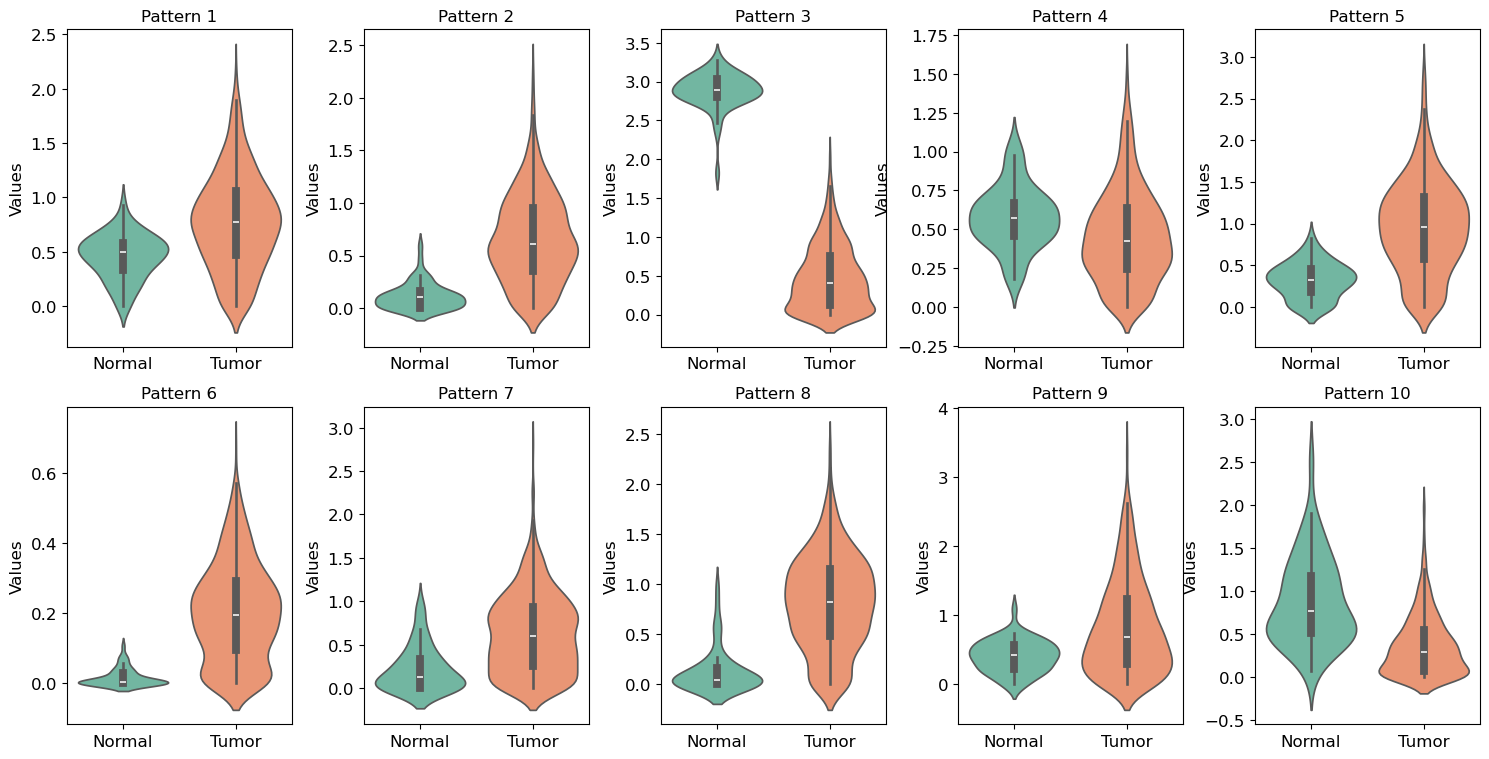

In [8]:
Chunk.getPatternDistribution(W, labels=['Normal', 'Tumor'], phenotype_interval = phenotype_interval)#,savefig = '/Data/yangyoupeng/pythonproject/Tensor/Data/res/pic/pattern.png'

In [9]:
res = Chunk.getLRcomm(W,H,comm_matrix2,patterns = [1,2,5,6,7,8,9], lr_expr_pairs = lr_expr_pairs,zscore_threshold = 2.5)#[1,2,5,6,7,8,9]

In [10]:
res2 = res.iloc[:70]

In [11]:
Chunk.plot_sankey(res, width=600, height=1600,thickness=80,font_size=16)

In [14]:
genes=[]
for i in res['l-r']:
    genes.append(str(lr_expr_pairs[lr_expr_pairs['l-r']==i]['ligand'].values[0]))
    genes.append(str(lr_expr_pairs[lr_expr_pairs['l-r']==i]['receptor'].values[0]))
lr_genes = lr_expr_df.loc[genes]
lr_genes = lr_genes[~lr_genes.index.duplicated(keep='first')]
gene_list = list(lr_genes.index)

In [15]:
import gseapy as gp
gene_list = list(lr_genes.index)
kegg_results = gp.enrichr(
    gene_list=gene_list,
    gene_sets="KEGG_2021_Human", 
    organism="Human",
    outdir="KEGG_results",
)

In [16]:
fontsize = 18
plt.rcParams.update({
    'font.size': fontsize,
    'axes.titlesize': fontsize,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': fontsize
})

/tmp/ipykernel_2996171/2681885341.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




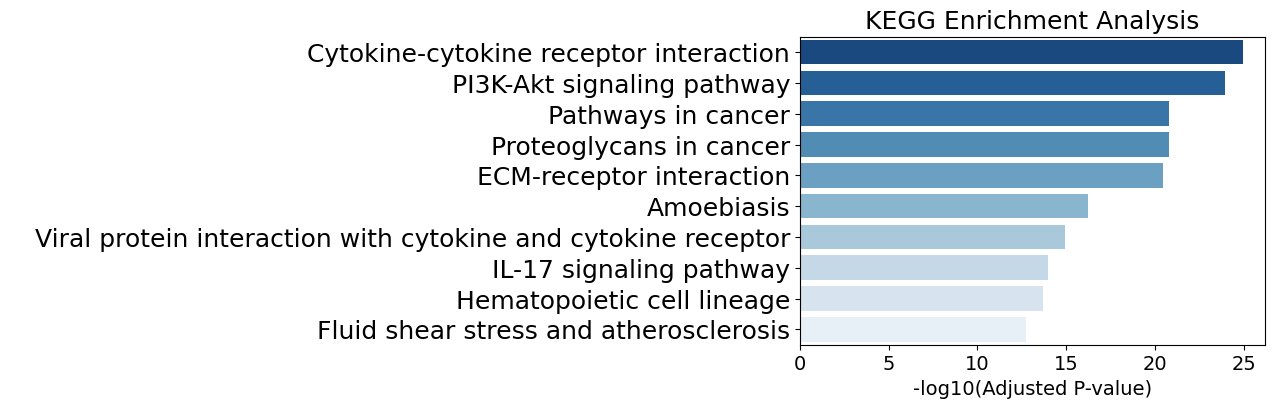

In [17]:
import seaborn as sns
df = kegg_results.res2d.sort_values("Adjusted P-value").head(10)  
df["logP"] = -np.log10(df["Adjusted P-value"])

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="logP", y="Term", palette="Blues_r")
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel(" ")
plt.title("KEGG Enrichment Analysis")
#plt.savefig("/Data/yangyoupeng/pythonproject/Tensor/Data/res/pic/pattern/CRC_kegg_bar.png", dpi=300, bbox_inches='tight')
plt.show()


In [18]:
from gseapy import GSEA
gs = GSEA(data=lr_expr_df[sorted_clin_df.index],
         gene_sets={'L-R':list(lr_genes.index)},
         classes = sorted_clin_df['tissue_type'].tolist(), 
         # set permutation_type to phenotype if samples >=15
         permutation_type='phenotype',
         permutation_num=1000, # reduce number to speed up test
         outdir=None,
         method='log2_ratio_of_classes',#t_test signal_to_noise ratio_of_classes diff_of_classes log2_ratio_of_classes
         threads=4, seed= 8)
gs.pheno_pos = "Tumor"
gs.pheno_neg = "Normal"
gs.run()

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

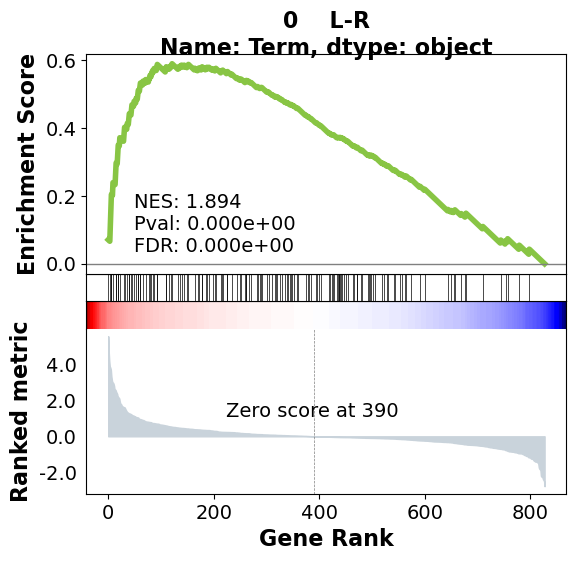

In [19]:
from gseapy.plot import gseaplot

terms = gs.res2d.Term
# to save your figure, make sure that ofname is not None
gseaplot(rank_metric=gs.ranking, term=terms, **gs.results[terms.values[0]])

In [20]:
adata = sc.read_h5ad("/Data/yangyoupeng/pythonproject/Tensor/Data/CRC-harmony-majorType.h5ad")

In [21]:
adata

AnnData object with n_obs × n_vars = 323702 × 1423
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'SpecimenType', 'TissueSource', 'ProcessingMethod', 'PatientTypeID', 'sex', 'Site', 'Grade', 'TumorStage', 'LymphNodeStatus', 'MMRStatusTumor', 'MMRMLH1Tumor', 'qc_geneCount', 'qc_logMappedReads', 'qc_meanReadsPerUmi', 'qc_totalReads', 'qc_logUmiCount', 'qc_bcSwapFraction', 'qc_geneSatFraction', 'qc_seqDupEst', 'qc_umiSatFraction', 'qc_emptyDropPval', 'qc_mitoFraction', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'log10GenesPerUMI', 'percent.mt', 'percent.ribo', 'percent.hb', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.05', 'seurat_clusters', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'RNA_s

In [22]:
sc_lr_expr_df, sc_lr_expr_pairs = Chunk.filter_scRNAdata(res, adata, label = 'Major Cell type')
print("Expression matrix shape:", sc_lr_expr_df.shape)
connectivities = Chunk.similarity2adjacent(adata, key='connectivities')
X = Chunk.calculate_correlation_matrix(lr_expr_df, sc_lr_expr_df)

Expression matrix shape: (151, 323702)
|**************************************************|
Performing quality-check for the correlations
The five-number summary of correlations:
Min: -0.0967900676103292
25th Percentile: 0.4555563388250168
Median: 0.5443882634816244
75th Percentile: 0.6225607248708349
Max: 0.9557075364687393
|**************************************************|


In [23]:
CCcomm = Chunk.CCcommInfer(method='binary',X = X, y = Y, alpha=0, lambda_=0.01, Omega=connectivities, learning_rate=0.001, n_epochs=1000)

/Data/yangyoupeng/pythonproject/Tensor/CHUNK/Chunk/CCcomm.py:360: UserWarning:

Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538440907/work/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)



Epoch [100/1000], Loss: 0.3511
Epoch [200/1000], Loss: 0.3197
Epoch [300/1000], Loss: 0.3016
Epoch [400/1000], Loss: 0.2859
Epoch [500/1000], Loss: 0.2713
Epoch [600/1000], Loss: 0.2791
Epoch [700/1000], Loss: 0.2490
Epoch [800/1000], Loss: 0.2404
Epoch [900/1000], Loss: 0.2399
Epoch [1000/1000], Loss: 0.2089


In [25]:
fontsize = 16
plt.rcParams.update({
    'font.size': fontsize,
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize
})

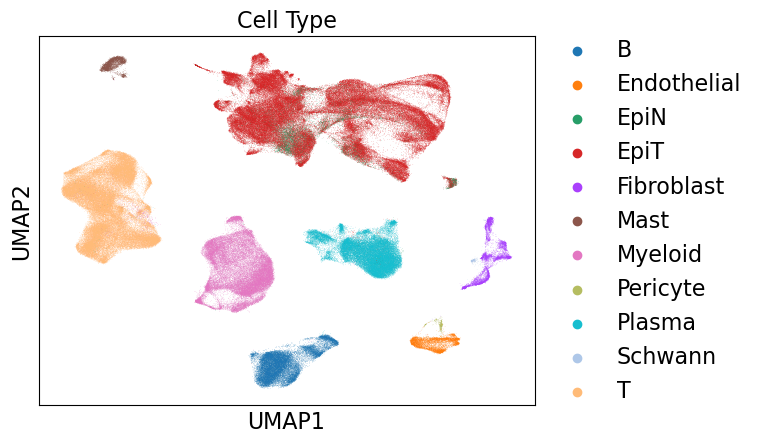

In [26]:
sc.pl.umap(adata, color='Major Cell type',title='Cell Type')#,save='umap.png'
#legend_fontsize=14, legend_loc='on data' , frameon=False

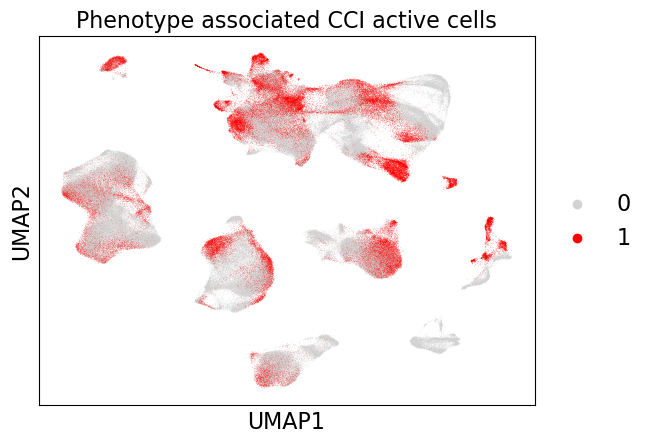

In [27]:
Chunk.getPosipotentialCCI(adata, CCcomm.model, threshold_percent=70)#,savefig = '/Data/yangyoupeng/pythonproject/Tensor/Data/res/pic/phetop30.png'

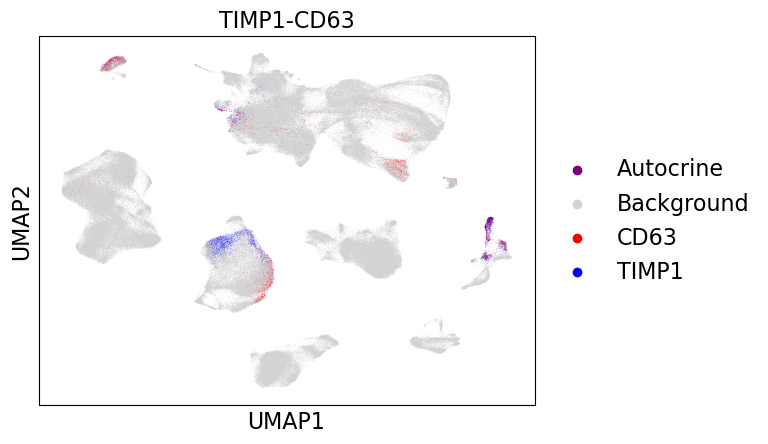

In [28]:
Chunk.getCCcomm(adata, 'TIMP1', 'CD63', L_threshold=5, R_threshold=5,  marked_col='phe_cell')

In [29]:
adata1 = adata[adata.obs['phe_cell'] == '1', :].copy()
adata1 = adata1[~adata1.obs['Major Cell type'].isna(),:]
Allcell = np.unique(adata1.obs['Major Cell type'].values).tolist()

In [30]:
interestcell = ['B', 'EpiN', 'EpiT', 'Fibroblast', 'Mast', 'Myeloid', 'Schwann', 'T']

In [26]:
pvalues, means, significant_means = Chunk.Cellphone(
        adata=adata1,
        celltype_key='Major Cell type',
        interactions=res,
        iterations=1000,
        senders=Allcell,
        receivers=Allcell,
        #subsampling_fraction=0.1
    )

Running randomization analysis: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:23<00:00,  1.35it/s]


/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:360: FutureWarning:

The provided callable <function mean at 0x7fb27454e830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:379: FutureWarning:

The provided callable <function mean at 0x7fb27454e830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:395: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:409: Futu

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 287.5434833330715
Plotting legends..
Estimated legend width: 21.344444444444445 mm
Incresing ncol


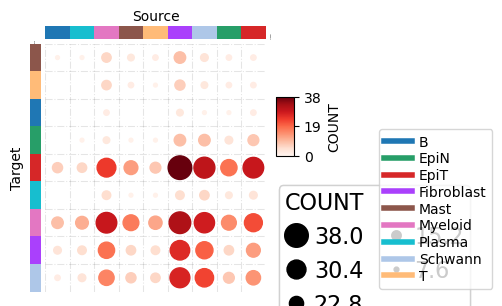

In [33]:
interaction_edges = Chunk.extract_interaction_edges(pvalues, alpha=0.05)
fig, ax = plt.subplots(figsize=(3,3)) 
Chunk.cci_heatmap(adata1,interaction_edges,celltype_key='Major Cell type',
                   fontsize=10,
          ax=ax,legend_kws={'fontsize':10,'bbox_to_anchor':(5, -0.9),'loc':'center left',})
#plt.savefig('/Data/yangyoupeng/pythonproject/Tensor/Data/res/pic/commheatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
fontsize = 13
plt.rcParams.update({
    'font.size': fontsize,
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize
})

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:360: FutureWarning:

The provided callable <function mean at 0x7fb27454e830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:379: FutureWarning:

The provided callable <function mean at 0x7fb27454e830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:395: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:409: Futu

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 68.18518804328546
Plotting legends..
Estimated legend width: 32.80972222222222 mm


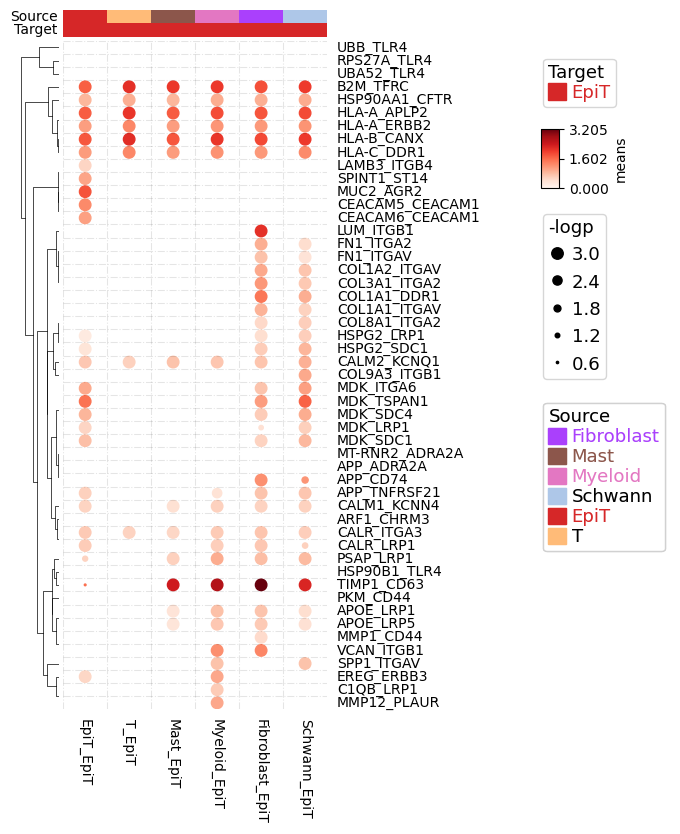

In [36]:
#interestcell = ['EpiT', 'Fibroblast', 'Mast', 'Myeloid', 'Schwann', 'T','EpiN']
ax = Chunk.cci_interacting_heatmap(adata=adata1,
                            celltype_key='Major Cell type',
                            means=means, 
                            pvalues=pvalues, 
                            source_cells=['Fibroblast', 'Mast', 'Myeloid', 'Schwann', 'T'],#Allcell,
                            target_cells=['EpiT'],
                            min_means=1,
                            nodecolor_dict=None,
                            ax=None,
                            figsize=(4,8),
                            fontsize=10,)

#plt.savefig('/Data/yangyoupeng/pythonproject/Tensor/Data/res/pic/commheatmap2_2EpiT_2.png', dpi=300, bbox_inches='tight')

plt.show()

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:360: FutureWarning:

The provided callable <function mean at 0x7fb27454e830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:379: FutureWarning:

The provided callable <function mean at 0x7fb27454e830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:395: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/home/yangyoupeng/anaconda3/envs/torch/lib/python3.10/site-packages/PyComplexHeatmap/dotHeatmap.py:409: Futu

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 197.05519344509494
Plotting legends..
Estimated legend width: 32.80972222222222 mm


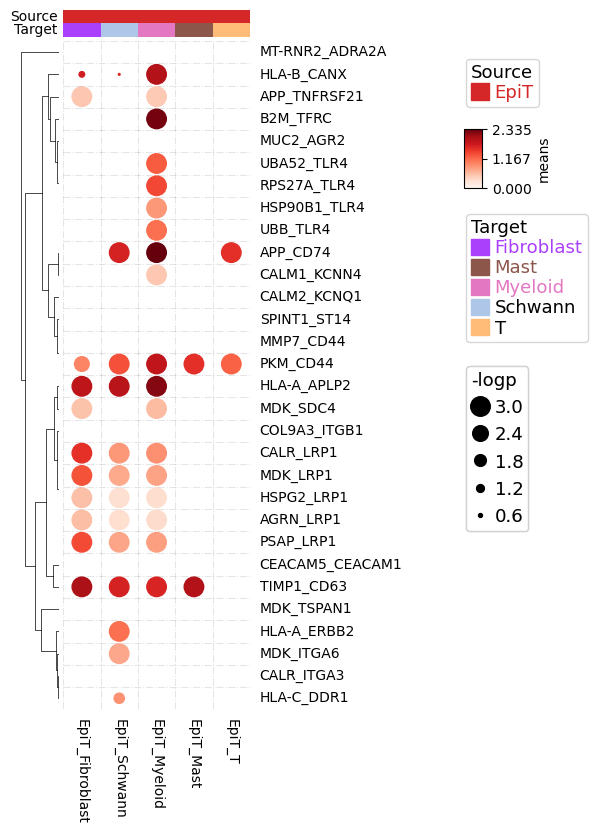

In [37]:
#interestcell = ['EpiT', 'Fibroblast', 'Mast', 'Myeloid', 'Schwann', 'T','EpiN']
ax = Chunk.cci_interacting_heatmap(adata=adata1,
                            celltype_key='Major Cell type',
                            means=means, 
                            pvalues=pvalues, 
                            source_cells=['EpiT'],#Allcell,
                            target_cells=['Fibroblast', 'Mast', 'Myeloid', 'Schwann', 'T'],
                            min_means=1,
                            nodecolor_dict=None,
                            ax=None,
                            figsize=(3,8),
                            fontsize=10,)

#plt.savefig('/Data/yangyoupeng/pythonproject/Tensor/Data/res/pic/commheatmap2_EpiT2_2.png', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
from PIL import Image
import json

In [39]:
adata = sc.read_10x_mtx(
    '/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058756/vismtx/',  
    var_names='gene_symbols',  
    make_unique=True         
)

# Read the spatial coordinates
tissue_positions = pd.read_csv('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058756/vismtx/GSM7058756_C1_tissue_positions_list.csv.gz', index_col=0,header=None)
adata.obs = adata.obs.join(tissue_positions, how='inner')
coordinates = adata.obs[[5, 4]].values  # Columns 5 and 6 are the x and y coordinates
adata.obsm['spatial'] = coordinates
adata.obs.columns = ['in_tissue', 'array_row', 'array_col','x_pixel','y_pixel']
# Read high-resolution images
hires_image = np.array(Image.open('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058756/vismtx/GSM7058756_C1_tissue_hires_image.png'))

# Read the scale factor
with open('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058756/vismtx/GSM7058756_C1_scalefactors_json.json', 'r') as f:
    scalefactors = json.load(f)

# Add image and scale factor to AnnData object
adata.uns['spatial'] = {
    'sample_id': {  
        'images': {
            'hires': hires_image  
        },
        'scalefactors': scalefactors 
    }
}

/tmp/ipykernel_2996171/3565708803.py:9: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



In [40]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=10)
if adata.var_names.duplicated().any():
    adata.var_names_make_unique()
adata = Chunk.counts2log1tpm(adata)
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [41]:
sample_id = list(adata.uns['spatial'].keys())[0]
hires_img = adata.uns['spatial'][sample_id]['images']['hires']
print(hires_img.dtype, hires_img.min(), hires_img.max())
# Convert the image to uint level 255
#hires_img = (hires_img * 255).astype(np.uint8)
#print(hires_img.dtype, hires_img.min(), hires_img.max())#Make sure the data is unit8 level 255

uint8 17 247


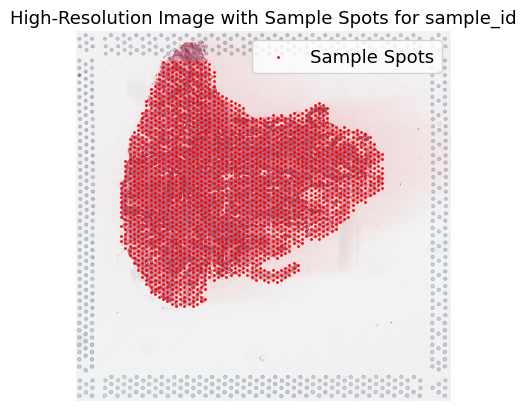

In [42]:
#Set coordinates
x_pixel = np.round(adata.obsm['spatial'][:,1]*adata.uns['spatial'][sample_id]['scalefactors']['tissue_hires_scalef']).astype(int)
y_pixel = np.round(adata.obsm['spatial'][:,0]*adata.uns['spatial'][sample_id]['scalefactors']['tissue_hires_scalef']).astype(int)

plt.imshow(hires_img)
plt.scatter(y_pixel, x_pixel, c='red', s=1, label='Sample Spots') 
plt.title(f"High-Resolution Image with Sample Spots for {sample_id}")
plt.axis("off")
plt.legend()
plt.show()

In [43]:
#Calculate adjacent matrix
"""
The ‘alpha’ parameter determines the weight given to histology when calculating Euclidean distance between every two spots. ‘alpha = 1’ means that the histology pixel intensity value has the same scale variance as the (x,y) coordinates, whereas higher value of ‘alpha’ indicates higher scale variance, hence, higher weight to histology, when calculating the Euclidean distance.
"""
b=adata.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'] #Diameter of spot
adj=Chunk.calculate_adj_matrix(x=x_pixel,y=y_pixel, x_pixel=x_pixel, y_pixel=y_pixel, image=hires_img, histology=True,beta=b, alpha=1)#
#adj=calculate_adj_matrix(x=x_pixel,y=y_pixel, histology=False)
adj = Chunk.create_knn_adj(adj,k=20)

Calculateing adj matrix using histology image...


In [44]:
st_lr_expr_df, st_lr_expr_pairs = Chunk.filter_stRNAdata(res, adata)
print("Expression matrix shape:", st_lr_expr_df.shape)
X = Chunk.calculate_correlation_matrix(lr_expr_df, st_lr_expr_df)

Expression matrix shape: (136, 2054)
|**************************************************|
Performing quality-check for the correlations
The five-number summary of correlations:
Min: 0.024686032377961745
25th Percentile: 0.6051874907064037
Median: 0.6643644583697845
75th Percentile: 0.7104480140735887
Max: 0.8833674125789494
|**************************************************|


In [45]:
CCcomm_st = Chunk.CCcommInfer(method='binary',X = X, y = Y, alpha=0, lambda_=0.05, Omega=adj, learning_rate=0.0001, n_epochs=800)

Epoch [100/800], Loss: 0.6644
Epoch [200/800], Loss: 0.6379
Epoch [300/800], Loss: 0.6220
Epoch [400/800], Loss: 0.6109
Epoch [500/800], Loss: 0.6023
Epoch [600/800], Loss: 0.5950
Epoch [700/800], Loss: 0.5886
Epoch [800/800], Loss: 0.5827


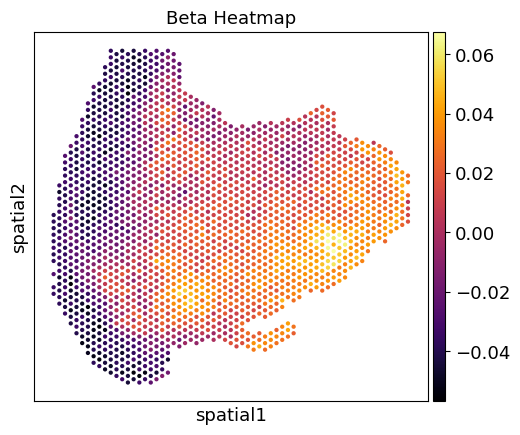

In [47]:
beta = CCcomm_st.model.linear.weight.detach().cpu().squeeze().numpy()
adata.obs['beta'] = beta
sc.pl.spatial(
    adata,
    img_key=None,
    color='beta',          
    cmap='inferno',        
    spot_size=adata.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'],          
    title="Beta Heatmap",  
    colorbar_loc='right'   
)

In [54]:
fontsize = 16
plt.rcParams.update({
    'font.size': fontsize,
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

Calculateing adj matrix using xy only...


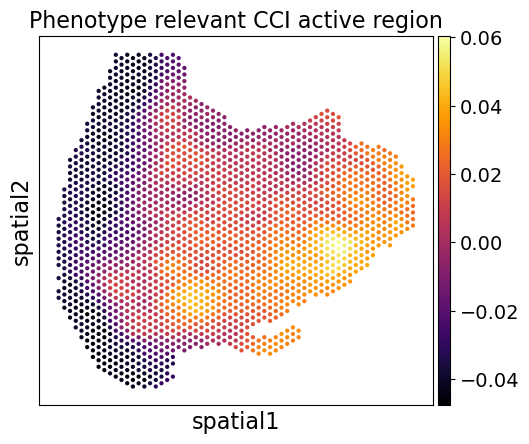

In [55]:
#adata.obs.index.tolist()
x_array = adata.obs['array_row'].tolist()
y_array = adata.obs['array_col'].tolist()
adj_2d=Chunk.calculate_adj_matrix(x=x_array,y=y_array, histology=False)
adata.obs['refined_beta']=Chunk.refine_beta(sample_id=adata.obs.index.tolist(), pred=adata.obs['beta'].tolist(), dis=adj_2d, shape="hexagon")
sc.pl.spatial(
    adata,
    img_key=None,
    color='refined_beta',          
    cmap='inferno',        
    spot_size=adata.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'],         
    title="Phenotype relevant CCI active region",  
    colorbar_loc='right',   
    #save = 'GSM7058756.png'
)

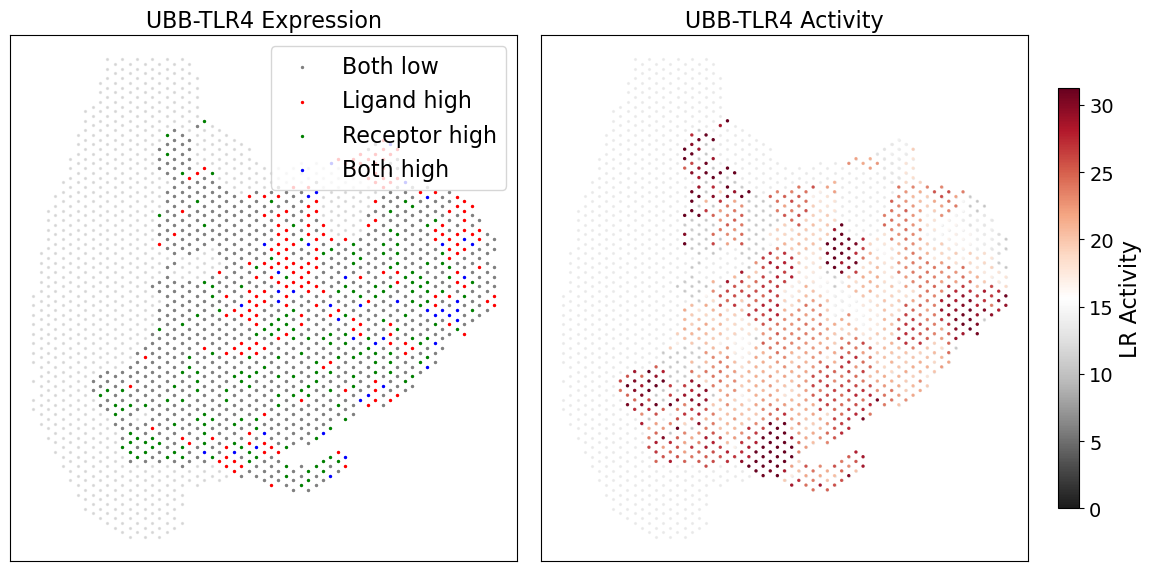

In [56]:
fig = Chunk.plot_Spatiallr(
    adata=adata,
    lr_pair=('UBB', 'TLR4'),
    knn=20
)
plt.show()

/tmp/ipykernel_2004610/1844711281.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



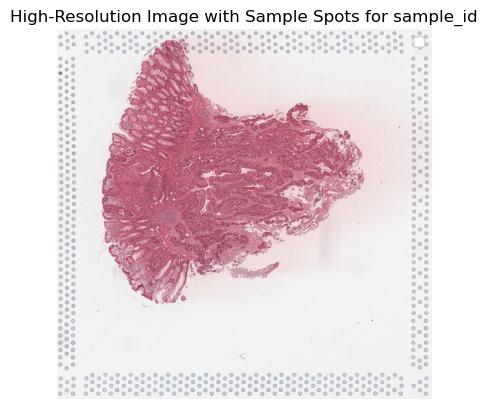

In [82]:
plt.imshow(hires_img)
plt.title(f"High-Resolution Image with Sample Spots for {sample_id}")
plt.axis("off")
plt.legend()
plt.show()

In [14]:
adata3 = sc.read_10x_mtx(
    '/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058758/',                
    var_names='gene_symbols',  
    make_unique=True,         
    prefix='GSM7058758_C3.'
)

tissue_positions = pd.read_csv('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058758/GSM7058758_C3_tissue_positions_list.csv.gz', index_col=0,header=None)
adata3.obs = adata3.obs.join(tissue_positions, how='inner')
coordinates = adata3.obs[[5, 4]].values  
adata3.obsm['spatial'] = coordinates
adata3.obs.columns = ['in_tissue', 'array_row', 'array_col','x_pixel','y_pixel']
hires_image = np.array(Image.open('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058758/GSM7058758_C3_tissue_hires_image.png'))

with open('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058758/GSM7058758_C3_scalefactors_json.json', 'r') as f:
    scalefactors = json.load(f)

adata3.uns['spatial'] = {
    'sample_id': { 
        'images': {
            'hires': hires_image  
        },
        'scalefactors': scalefactors  
    }
}

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


/tmp/ipykernel_3247127/2514153073.py:9: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



In [15]:
sc.pp.calculate_qc_metrics(adata3, inplace=True)
sc.pp.filter_genes(adata3, min_cells=10)
sc.pp.filter_cells(adata3, min_genes=10)
if adata3.var_names.duplicated().any():
    adata3.var_names_make_unique()
adata3 = Chunk.counts2log1tpm(adata3)
sc.pp.calculate_qc_metrics(adata3, inplace=True)
sample_id = list(adata3.uns['spatial'].keys())[0]
hires_img = adata3.uns['spatial'][sample_id]['images']['hires']
print(hires_img.dtype, hires_img.min(), hires_img.max())

uint8 13 246


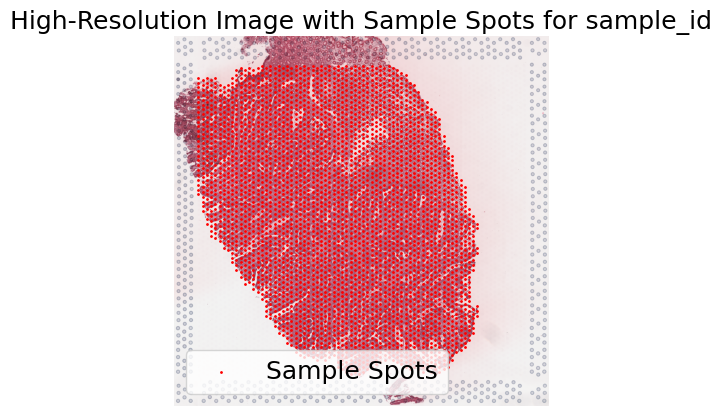

In [16]:
#Set coordinates
x_pixel = np.round(adata3.obsm['spatial'][:,1]*adata3.uns['spatial'][sample_id]['scalefactors']['tissue_hires_scalef']).astype(int)
y_pixel = np.round(adata3.obsm['spatial'][:,0]*adata3.uns['spatial'][sample_id]['scalefactors']['tissue_hires_scalef']).astype(int)

plt.imshow(hires_img)
plt.scatter(y_pixel, x_pixel, c='red', s=1, label='Sample Spots') 
plt.title(f"High-Resolution Image with Sample Spots for {sample_id}")
plt.axis("off")
plt.legend()
plt.show()

In [17]:
#Calculate adjacent matrix
"""
The ‘alpha’ parameter determines the weight given to histology when calculating Euclidean distance between every two spots. ‘alpha = 1’ means that the histology pixel intensity value has the same scale variance as the (x,y) coordinates, whereas higher value of ‘alpha’ indicates higher scale variance, hence, higher weight to histology, when calculating the Euclidean distance.
"""
b=adata3.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'] #Diameter of spot
adj=Chunk.calculate_adj_matrix(x=x_pixel,y=y_pixel, x_pixel=x_pixel, y_pixel=y_pixel, image=hires_img, histology=True,beta=b, alpha=1)#
#adj=calculate_adj_matrix(x=x_pixel,y=y_pixel, histology=False)
adj = Chunk.create_knn_adj(adj,k=20)
st_lr_expr_df, st_lr_expr_pairs = Chunk.filter_stRNAdata(res, adata3)
print("Expression matrix shape:", st_lr_expr_df.shape)
X = Chunk.calculate_correlation_matrix(lr_expr_df, st_lr_expr_df)

Calculateing adj matrix using histology image...
Expression matrix shape: (136, 3417)
|**************************************************|
Performing quality-check for the correlations
The five-number summary of correlations:
Min: -0.08433633244050172
25th Percentile: 0.5427523439028918
Median: 0.6377312337938219
75th Percentile: 0.6996473514640597
Max: 0.8729510552087394
|**************************************************|


In [18]:
CCcomm_st = Chunk.CCcommInfer(method='binary',X = X, y = Y, alpha=0, lambda_=0.05, Omega=adj, learning_rate=0.0001, n_epochs=800)

/Data/yangyoupeng/pythonproject/Tensor/CHUNK/Chunk/CCcomm.py:360: UserWarning:

Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538440907/work/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)



Epoch [100/800], Loss: 0.6415
Epoch [200/800], Loss: 0.6140
Epoch [300/800], Loss: 0.5971
Epoch [400/800], Loss: 0.5846
Epoch [500/800], Loss: 0.5746
Epoch [600/800], Loss: 0.5660
Epoch [700/800], Loss: 0.5585
Epoch [800/800], Loss: 0.5519


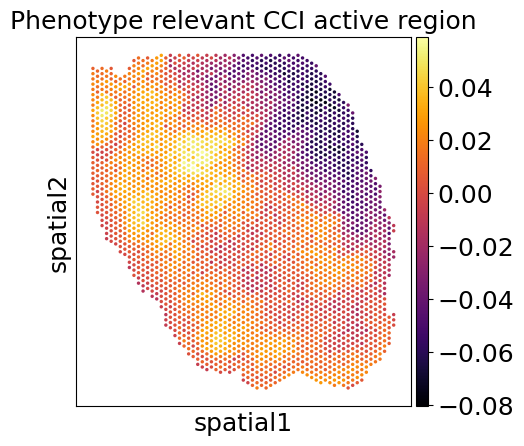

In [20]:
beta = CCcomm_st.model.linear.weight.detach().cpu().squeeze().numpy()
adata3.obs['beta'] = beta
sc.pl.spatial(
    adata3,
    img_key=None,
    color='beta',          
    cmap='inferno',        
    spot_size=adata3.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'],          
    title="Phenotype relevant CCI active region",  
    colorbar_loc='right'   
)

In [20]:
fontsize = 16
plt.rcParams.update({
    'font.size': fontsize,
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

Calculateing adj matrix using xy only...


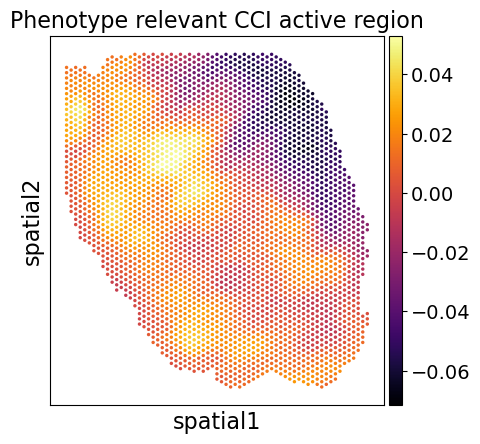

In [22]:
#adata.obs.index.tolist()
x_array = adata3.obs['array_row'].tolist()
y_array = adata3.obs['array_col'].tolist()
adj_2d=Chunk.calculate_adj_matrix(x=x_array,y=y_array, histology=False)
adata3.obs['refined_beta']=Chunk.refine_beta(sample_id=adata3.obs.index.tolist(), pred=adata3.obs['beta'].tolist(), dis=adj_2d, shape="hexagon")
sc.pl.spatial(
    adata3,
    img_key=None,
    color='refined_beta',          
    cmap='inferno',        
    spot_size=adata3.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'],         
    title="Phenotype relevant CCI active region",  
    colorbar_loc='right',
    save = 'GSM7058758.png'
)

In [14]:
adata4 = sc.read_10x_mtx(
    '/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058759/',                
    var_names='gene_symbols', 
    make_unique=True,       
    prefix='GSM7058759_C4.'
)

tissue_positions = pd.read_csv('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058759/GSM7058759_C4_tissue_positions_list.csv.gz', index_col=0,header=None)
adata4.obs = adata4.obs.join(tissue_positions, how='inner')
coordinates = adata4.obs[[5, 4]].values  
adata4.obsm['spatial'] = coordinates
adata4.obs.columns = ['in_tissue', 'array_row', 'array_col','x_pixel','y_pixel']
hires_image = np.array(Image.open('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058759/GSM7058759_C4_tissue_hires_image.png'))

with open('/Data/yangyoupeng/pythonproject/Tensor/Data/GSE225857/GSM7058759/GSM7058759_C4_scalefactors_json.json', 'r') as f:
    scalefactors = json.load(f)

adata4.uns['spatial'] = {
    'sample_id': {
        'images': {
            'hires': hires_image  
        },
        'scalefactors': scalefactors  
    }
}

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


/tmp/ipykernel_3327089/209689813.py:9: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



In [15]:
sc.pp.calculate_qc_metrics(adata4, inplace=True)
sc.pp.filter_genes(adata4, min_cells=10)
sc.pp.filter_cells(adata4, min_genes=10)
if adata4.var_names.duplicated().any():
    adata4.var_names_make_unique()
adata4 = Chunk.counts2log1tpm(adata4)
sc.pp.calculate_qc_metrics(adata4, inplace=True)
sample_id = list(adata4.uns['spatial'].keys())[0]
hires_img = adata4.uns['spatial'][sample_id]['images']['hires']
print(hires_img.dtype, hires_img.min(), hires_img.max())

uint8 20 248


/tmp/ipykernel_3327089/3478835350.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



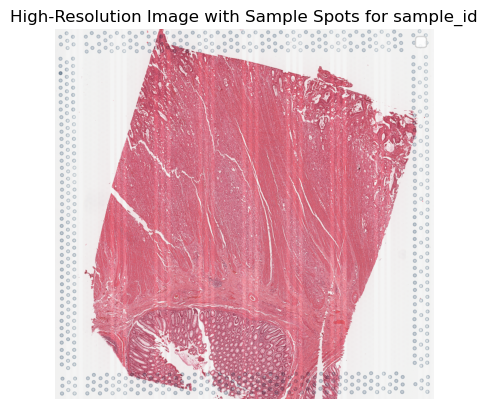

In [16]:
#Set coordinates
x_pixel = np.round(adata4.obsm['spatial'][:,1]*adata4.uns['spatial'][sample_id]['scalefactors']['tissue_hires_scalef']).astype(int)
y_pixel = np.round(adata4.obsm['spatial'][:,0]*adata4.uns['spatial'][sample_id]['scalefactors']['tissue_hires_scalef']).astype(int)

plt.imshow(hires_img)
#plt.scatter(y_pixel, x_pixel, c='red', s=1, label='Sample Spots') 
plt.title(f"High-Resolution Image with Sample Spots for {sample_id}")
plt.axis("off")
plt.legend()
plt.show()

In [17]:
#Calculate adjacent matrix
"""
The ‘alpha’ parameter determines the weight given to histology when calculating Euclidean distance between every two spots. ‘alpha = 1’ means that the histology pixel intensity value has the same scale variance as the (x,y) coordinates, whereas higher value of ‘alpha’ indicates higher scale variance, hence, higher weight to histology, when calculating the Euclidean distance.
"""
b=adata4.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'] #Diameter of spot
adj=Chunk.calculate_adj_matrix(x=x_pixel,y=y_pixel, x_pixel=x_pixel, y_pixel=y_pixel, image=hires_img, histology=True,beta=b, alpha=1)#
#adj=calculate_adj_matrix(x=x_pixel,y=y_pixel, histology=False)
adj = Chunk.create_knn_adj(adj,k=20)
st_lr_expr_df, st_lr_expr_pairs = Chunk.filter_stRNAdata(res, adata4)
print("Expression matrix shape:", st_lr_expr_df.shape)
X = Chunk.calculate_correlation_matrix(lr_expr_df, st_lr_expr_df)

Calculateing adj matrix using histology image...
Expression matrix shape: (133, 4016)
|**************************************************|
Performing quality-check for the correlations
The five-number summary of correlations:
Min: -0.09330087537474935
25th Percentile: 0.424103407145417
Median: 0.5005298447194824
75th Percentile: 0.5736188112443785
Max: 0.8357337250419434
|**************************************************|


In [18]:
CCcomm_st = Chunk.CCcommInfer(method='binary',X = X, y = Y, alpha=0, lambda_=0.05, Omega=adj, learning_rate=0.0001, n_epochs=800)

/Data/yangyoupeng/pythonproject/Tensor/CHUNK/Chunk/CCcomm.py:360: UserWarning:

Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538440907/work/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)



Epoch [100/800], Loss: 0.6645
Epoch [200/800], Loss: 0.6428
Epoch [300/800], Loss: 0.6301
Epoch [400/800], Loss: 0.6206
Epoch [500/800], Loss: 0.6124
Epoch [600/800], Loss: 0.6050
Epoch [700/800], Loss: 0.5980
Epoch [800/800], Loss: 0.5913


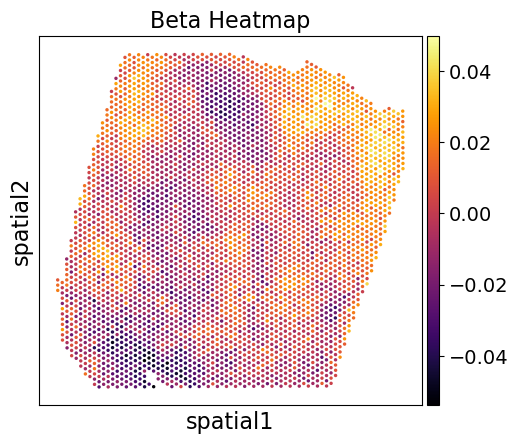

In [21]:
beta = CCcomm_st.model.linear.weight.detach().cpu().squeeze().numpy()
adata4.obs['beta'] = beta
sc.pl.spatial(
    adata4,
    img_key=None,
    color='beta',          
    cmap='inferno',        
    spot_size=adata4.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'],          
    title="Beta Heatmap",  
    colorbar_loc='right'   
)

Calculateing adj matrix using xy only...


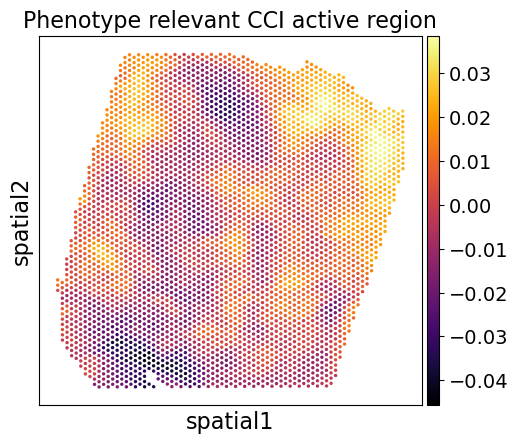

In [23]:
#adata.obs.index.tolist()
x_array = adata4.obs['array_row'].tolist()
y_array = adata4.obs['array_col'].tolist()
adj_2d=Chunk.calculate_adj_matrix(x=x_array,y=y_array, histology=False)
adata4.obs['refined_beta']=Chunk.refine_beta(sample_id=adata4.obs.index.tolist(), pred=adata4.obs['beta'].tolist(), dis=adj_2d, shape="hexagon")
sc.pl.spatial(
    adata4,
    img_key=None,
    color='refined_beta',          
    cmap='inferno',        
    spot_size=adata4.uns['spatial'][sample_id]['scalefactors']['spot_diameter_fullres'],         
    title="Phenotype relevant CCI active region",  
    colorbar_loc='right',
    save = 'GSM7058759.png'
)